In the [last lesson](https://www.kaggle.com/prashantkikani/introduction-to-basic-python-libraries-for-ml), we saw basics of Python libraris which we use in Machine Learning.<br>
Today in this lesson, we are going to solve one of the most famous & interesting problem. **Titanic survival problem** 🛳️

![titanic](https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

<br>
In this problem, we have some data about each passenger that were into that ship.<br>
**Our problem is to predict or forecast, whether this person will survive the ship sinking or not**.<br><br>

We will try to solve this problem in a standard way.<br>
We can solve any machine learning problem this way.<br>

## Goal of this lesson is to learn a standard way to solve / approch any machine learning problem.

We will keep this lesson as simple as possible so that everyone can grasp the idea & learn to solve any basic problem in ML.

Here are the steps we tentatively follow.<br>
1. Open the data files.
2. Understand the data. What each column in the table means.
3. Preprocess data
    * Remove the outliers.
    * Fill `NaN` or `null` values. Sometimes, we also remove all the rows with `NaN` values.
    * Feature engineering - Create new columns out of existing columns using our understanding.
    * Converting data into numeric form if it's not.
4. Train a machine learning model.
5. Validate the trained model i.e. checking it's performance on unseen data.
6. If it performs good in validation, use model to predict future real world data.

<br>
Above steps are generally followed to solve a ML problem.<br>
So, let's start..

In [1]:
# import necessary libraries first

# pandas to open data files & processing it.
import pandas as pd

# numpy for numeric data processing
import numpy as np

# sklearn to do preprocessing & ML models
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Matplotlob & seaborn to plot graphs & visulisation
import matplotlib.pyplot as plt 
import seaborn as sns

# to fix random seeds
import random, os

# ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# 1. Open the data files.

In [2]:
titanic_data = pd.read_csv("../input/titanic/train.csv")
titanic_data.shape

(891, 12)

So, we have total of 891 rows & 12 columns

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Understand the data. What each column in the table means.

**Each row in above table contains data of a passenger.<br>**
Those details include following columns.<br>

Here is all the columns of above table mean.<br>

`PassengerId` : Unique ID for each passenger.<br><br>
`Survived` : Whether that passenger survived or not. (0 = No, 1 = Yes)<br><br>
`Pclass` : Ticket class of passenger. (1 = Upper, 2 = Middle, 3 = Lower)<br><br>
`Name` : Name of passenger<br><br>
`Sex` : Gender of passenger<br><br>
`Age` : Age of passenger<br><br>
`SibSp` : # of siblings / spouses aboard the Titanic of passenger<br><br>
`Parch` : # of parents / children aboard the Titanic of passenger<br><br>
`Ticket` : Ticket number of passenger<br><br>
`Fare` : Ticket amount / passenger fare.<br><br>
`Cabin` : Cabin number of passenger<br><br>
`Embarked` : Port of Embarkation of passenger. (C = Cherbourg, Q = Queenstown, S = Southampton)<br><br>

In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Let's check unique values for each column

In [5]:
# Survival
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

So, total 335 people have survived & 547 people have died in the Titanic.

In [6]:
# Ticket class
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

This tells `3` value occurs 491 times, `1` value occurs 207 times etc.

In [7]:
# Gender
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
# Siblings
titanic_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
# Parent or Childs
titanic_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
# Embarked station
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Most of the passengers have embarked from "Cherbourg" & "Southampton"

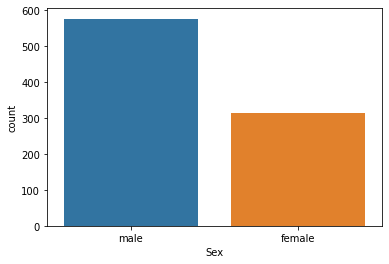

In [11]:
sns.countplot(titanic_data['Sex']);

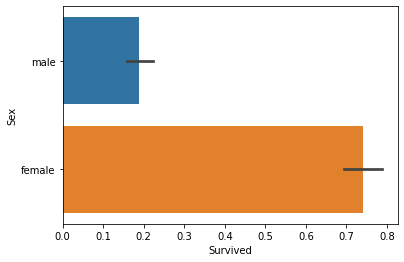

In [12]:
sns.barplot(titanic_data['Survived'], titanic_data['Sex']);

Wow !<br>
~75% of females have survived.<br>
Even if total number of females are less than males.<br><br>

May be because, females were given more priority in lifeboats than males. May be.

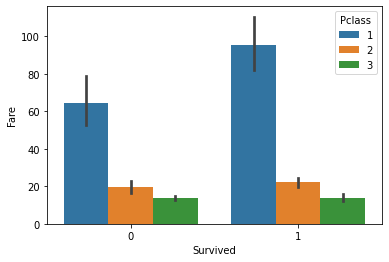

In [13]:
sns.barplot(titanic_data['Survived'], titanic_data['Fare'], titanic_data['Pclass']);

People with higher class have higher chances of survival !

# 3. Preprocess data

In preprocessing step, we detect outliers & remove them from our data.

## 3.1

## What is an outlier in data? Why does it occur?
Outliers are as the name suggests, very different from general / normal trend.<br>
They occur in data because of some faults in data collection pipeline.<br><br>

## Why we generally remove outliers?
Because one big outlier can mess up whole model's performance.<br>
Even if all other contributions might be of a low value, one high outlier value already shifts the entire gradient towards higher values as well.<br>

Most of the time, we remove outliers so that, we can train our model only from general trends.<br>
Let's see some examples using our titanic data.<br>

### One common practice followed to detect outliers is BoxPlot.

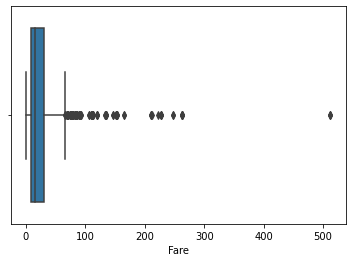

In [14]:
sns.boxplot(x=titanic_data["Fare"])
plt.show()

We can see, for majority of passengers, `Fare` price is less than 250.<br>
So, let's only keep the rows with `Fare` < 250.

In [15]:
# Only take rows which have "Fare" value less than 250.
titanic_data = titanic_data[titanic_data['Fare'] < 250]
titanic_data.shape

(882, 12)

So, we have removed 9 rows.<br>Originally, there were 891 rows.

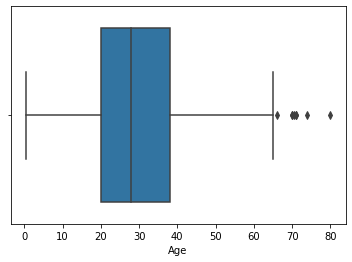

In [16]:
sns.boxplot(x=titanic_data["Age"])
plt.show()

We can see there are some outliers in `Age`, but they are not much far. So, we will keep as of now.

## 3.2 Fill NaN or null values in data

### Why NaN (not a number) values occur in data?
Sometimes, while collecting data, if some information is missing for some rows, it's filled as NaN.<br>
It means nothing is there.<br>
It's empty.<br>

### How NaN values can be handled?
There are several methods.
* Fill a specified value like "EMPTY" or -1 for all the NaN values.
    * This option is good for categorical type columns / features.
* If column is numeric in nature, fill with mean or median of that specific column.
    * This option is good for numerical type columns / features.
* Remove all the raws who have atleast 1 NaN value in any column.
    * If total number of raws with NaN values is less, we can just remove those rows from our data.

Let's look if there are any missing values in our data.

In [17]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

There are 177 NaN values in Age & 686 NaN values in Cabin column.<br>
In Cabin more than 75% values are empty.<br>
So, we will just remove that column.

In [18]:
titanic_data.drop("Cabin", axis=1, inplace=True)
titanic_data.shape

(882, 11)

In [19]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

We can see `Cabin` column is removed from our data.<br><br>
Now, `Age` is a numeric column.<br>
So, let's fill NaN values by mean of all the other non-NaN values.

In [20]:
age_mean = titanic_data['Age'].mean()
print(age_mean)

29.68818439716312


We can fill all the NaN values using `fillna` 

In [21]:
titanic_data['Age'].fillna(age_mean, inplace=True)

In [22]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

There are just 2 NaN values in `Embarked` column.<br>
We handle NaN values in `Embarked` column by filling most occuring value in that column.

In [23]:
titanic_data['Embarked'].value_counts()

S    640
C    163
Q     77
Name: Embarked, dtype: int64

In [24]:
titanic_data['Embarked'].fillna("S", inplace=True)

In [25]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now, we can see, no NaN values are there in our whole data.

Next step is **Feature Engineering**

## 3.3

### What is Feature Engineering?
> Feature Engineering is creating more meaningful data out of existing data using our domain knowledge & comman sense.<br>

In other words, we try to create more relevant information for our ML models. <br>
So, that our model can capture patterns in faster & better ways.

### Now, this is a creative step. We need to use brain to create relevant features in the data.

Let's think.

In [26]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


Let's once again look at what we have at hand.<br><br><br>
`PassengerId` : Unique ID for each passenger.<br><br>
`Survived` : Whether that passenger survived or not. (0 = No, 1 = Yes)<br><br>
`Pclass` : Ticket class of passenger. (1 = Upper, 2 = Middle, 3 = Lower)<br><br>
`Name` : Name of passenger<br><br>
`Sex` : Gender of passenger<br><br>
`Age` : Age of passenger<br><br>
`SibSp` : # of siblings / spouses aboard the Titanic of passenger<br><br>
`Parch` : # of parents / children aboard the Titanic of passenger<br><br>
`Ticket` : Ticket number of passenger<br><br>
`Fare` : Ticket amount / passenger fare.<br><br>
`Embarked` : Port of Embarkation of passenger. (C = Cherbourg, Q = Queenstown, S = Southampton)<br><br>

### How can we use these columns to create more relevant information?

Let's use `SibSp` & `Parch` to create a `total_family_members` feature.

In [27]:
titanic_data['total_family_members'] = titanic_data['Parch'] + titanic_data['SibSp'] + 1

# if total family size is 1, person is alone.
titanic_data['is_alone'] = titanic_data['total_family_members'].apply(lambda x: 0 if x > 1 else 1)

titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2,0


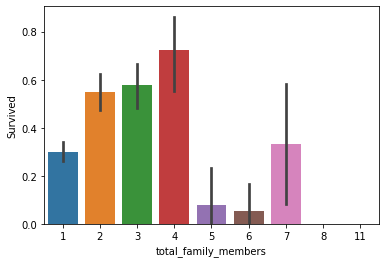

In [28]:
sns.barplot(titanic_data['total_family_members'], titanic_data['Survived'])

Interesting.<br>
People with total_family_members = 4 have more than 70% chances of survival !<br><br>

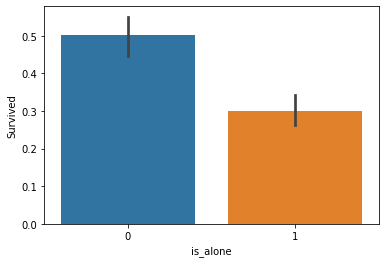

In [29]:
sns.barplot(titanic_data['is_alone'], titanic_data['Survived'])

People with family have 20% higher chance of survival than people travelling alone !!

`Age` column also can be used to create partitions.<br>
We can use `apply` function to `Age` column to create new column `age_group`<br>
Like..

In [30]:
def age_to_group(age):
    if 0 < age < 12:
        # children
        return 0
    elif 12 <= age < 50:
        # adult
        return 1
    elif age >= 50:
        # elderly people
        return 2
    
titanic_data['age_group'] = titanic_data['Age'].apply(age_to_group)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1,1
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q,1,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,5,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,3,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2,0,1


### Why this age_group feature is useful ?
Let's see..

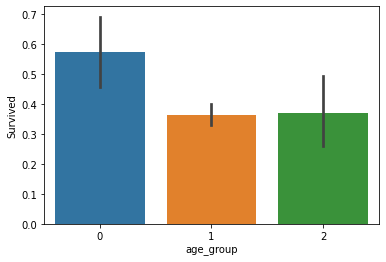

In [31]:
sns.barplot(titanic_data['age_group'], titanic_data['Survived']);

`0` i.e. children have higher survival rate compared to adults & elderly people.<br>
This data may become useful to our model.<br>

### Can you think of any way we can use `name` column ?
We can capture name title like Mr. Ms. Miss. etc.

In [32]:
titanic_data['name_title'] = titanic_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,1,Mr


In [33]:
titanic_data['name_title'].value_counts()

Mr          513
Miss        177
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Don           1
Jonkheer      1
Mme           1
Sir           1
Ms            1
Lady          1
Countess      1
Name: name_title, dtype: int64

In [34]:
def clean_name_title(val):
    if val in ['Rev', 'Col', 'Mlle', 'Mme', 'Ms', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Countess', 'Capt']:
        return 'RARE'
    else:
        return val

titanic_data['name_title'] = titanic_data['name_title'].apply(clean_name_title)
titanic_data['name_title'].value_counts()

Mr        513
Miss      177
Mrs       125
Master     40
RARE       18
Dr          7
Major       2
Name: name_title, dtype: int64

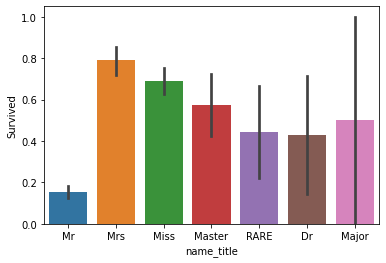

In [35]:
sns.barplot(titanic_data['name_title'], titanic_data['Survived']);

People with `Mrs` & `Miss` titles i.e. females have high chances of survival.<br>
But in males, with `Master` title, you have higher chances of survival !<br><br>

In [36]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1,1,Mr
5,6,0,3,"Moran, Mr. James",male,29.688184,0,0,330877,8.4583,Q,1,1,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,1,2,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,5,0,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,3,0,1,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2,0,1,Mrs


Let's drop columns which are not useful to us as of now.<br>

In [37]:
# save the target column 
target = titanic_data['Survived'].tolist()

titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1, inplace=True)

In [38]:
titanic_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,3,male,22.0,1,0,7.2500,S,2,0,1,Mr
1,1,female,38.0,1,0,71.2833,C,2,0,1,Mrs
2,3,female,26.0,0,0,7.9250,S,1,1,1,Miss
3,1,female,35.0,1,0,53.1000,S,2,0,1,Mrs
4,3,male,35.0,0,0,8.0500,S,1,1,1,Mr


## 3.4 Convert all the data into numeric form

We can see, `Sex`, `Embarked` & `name_title` are not in numeric form.<br>
Let's convert them via LabelEncoder from sci-kit learn.

In [39]:
le = preprocessing.LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'])
titanic_data['name_title'] = le.fit_transform(titanic_data['name_title'])
titanic_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,total_family_members,is_alone,age_group,name_title
0,3,1,22.0,1,0,7.2500,2,2,0,1,4
1,1,0,38.0,1,0,71.2833,0,2,0,1,5
2,3,0,26.0,0,0,7.9250,2,1,1,1,3
3,1,0,35.0,1,0,53.1000,2,2,0,1,5
4,3,1,35.0,0,0,8.0500,2,1,1,1,4


Now, we have everything in numbers !!

# 4. Train a machine learning model.

In this step, we choose a ML model & train it one the data we have.<br>
For this lesson, we will use basic `LogisticRegression` model.<br>

But first of all, let's split our data into training & validation part.<br>
There's `train_test_split` from sci-kit learn.

In [40]:
train_data, val_data, train_target, val_target = train_test_split(titanic_data, target, test_size=0.2)
train_data.shape, val_data.shape, len(train_target), len(val_target)

((705, 11), (177, 11), 705, 177)

We have our training data & validation data.<br>
We have randomly choosen 20% of the all the rows on which we will check our model's performance.

In [41]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

# We fix all the random seed so that, we can reproduce the results.
seed_everything(2020)

In [42]:
# Train the LogisticRegression model.

model = LogisticRegression()
model.fit(train_data, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Training is done.<br>
We have trainied our Logistic Regression model.<br><br>

# 5. Validate the trained model i.e. checking it's performance on unseen data.

It's called "unseen" because our ML model have never seen this data.<br>
It's kind of a test for it.<br>
Where it's performance will be checked on data which it have never seen or train.

In [43]:
# Predict labels on Validation data which model have never seen before.

val_predictions = model.predict(val_data)
len(val_predictions)

177

In [44]:
# first 10 values of validation_predictions
val_predictions[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
# Calculate the accuracy score on validation data.
# We already have correct target information for them.

accuracy = accuracy_score(val_target, val_predictions)
accuracy

0.8022598870056498

## Voila !!<br>


In [46]:
print("We got %.3f percent accuracy on our validation unseen data !!"%(accuracy*100))
print("We are %.3f correct in predicting whether a person will survice in Titanic crash !!"%(accuracy*100))

We got 80.226 percent accuracy on our validation unseen data !!
We are 80.226 correct in predicting whether a person will survice in Titanic crash !!


## How cool is that..!!

There's a lot can be done to improve performance.<br>
But we will not do that as of now to keep things simple as of now.<br>

# 6. If it performs good in validation, use model to predict future real world data.

### Now, we can use this model to other people & predict if they were on Titanic ship in 1912 !! 

# Summary

So, in this lesson, we saw, what a typical pipeline looks like in solving a machine learning(ML) problem.

1. Open the data files.
2. Understand the data. What each column in the table means.
3. Preprocess data
    * Remove the outliers.
    * Fill `NaN` or `null` values. Sometimes, we also remove all the rows with `NaN` values.
    * Feature engineering - Create new columns out of existing columns using our understanding.
    * Converting data into numeric form if it's not.
4. Train a machine learning model.
5. Validate the trained model i.e. checking it's performance on unseen data.
6. If it performs good in validation, use model to predict future real world data.


## Upvote this kernel if you have learned something from it.
## Tell me if you have any kind of doubts / questions in comment section below.

## In next lesson we will solve this same problem with deep learning.
## See you in the [next lesson](https://www.kaggle.com/prashantkikani/solving-the-titanic-problem-deep-learning-way) 👋